<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [5]:
!pip install pandas

### Step 1: Import Required Libraries


In [6]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [8]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

duplicates = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicates.head())

Number of duplicate rows: 0

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdm

##### Task 2: Remove the duplicate rows from the dataframe.



In [9]:
# Optional: drop duplicates and see the new shape
df_cleaned = df.drop_duplicates()
print("Original shape:", df.shape)
print("Shape after dropping duplicates:", df_cleaned.shape)

Original shape: (65437, 114)
Shape after dropping duplicates: (65437, 114)


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [10]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [11]:
# Count the number of missing values in the 'RemoteWorkRemoteWork' column
missing_RemoteWork = df['RemoteWork'].isnull().sum()

# Display the result
print(f"Number of missing values in 'RemoteWork' column: {missing_RemoteWork}")

Number of missing values in 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [12]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [13]:
# Identify the most frequent (majority) value in 'RemoteWork' column
majority_value_RemoteWork = df['RemoteWork'].mode()[0]

# Display the result
print(f"The most frequent value in 'RemoteWork' column is: {majority_value_RemoteWork}")

The most frequent value in 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [14]:
# Impute missing values in 'RemoteWork' column with the most frequent value
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

# Verify if there are any missing values left in the column
missing_RemoteWork_after = df['RemoteWork'].isnull().sum()
print(f"Number of missing values in 'RemoteWork' column after imputation: {missing_RemoteWork_after}")

Number of missing values in 'RemoteWork' column after imputation: 0


/tmp/ipykernel_3311/1664834155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


##### Task 8: Check for any compensation-related columns and describe their distribution.



In [17]:
print("Missing values in compensation-related columns:")
print(df[['CompTotal', 'ConvertedCompYearly']].isnull().sum())
print("\nSummary statistics for compensation-related columns:")
print(df[['CompTotal', 'ConvertedCompYearly']].describe())

Missing values in compensation-related columns:
CompTotal              31697
ConvertedCompYearly    42002
dtype: int64

Summary statistics for compensation-related columns:
           CompTotal  ConvertedCompYearly
count   3.374000e+04         2.343500e+04
mean   2.963841e+145         8.615529e+04
std    5.444117e+147         1.867570e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.271200e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079715e+05
max    1.000000e+150         1.625660e+07


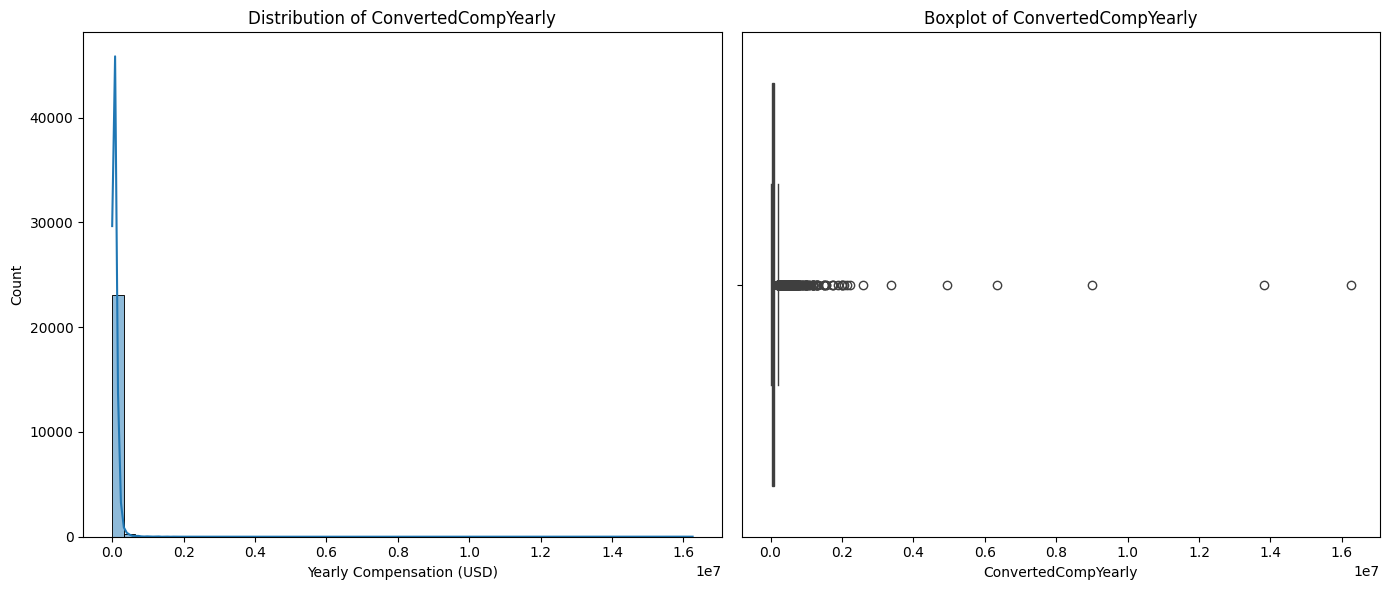

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram of ConvertedCompYearly
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('Yearly Compensation (USD)')

# Boxplot to spot outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ConvertedCompYearly'].dropna())
plt.title('Boxplot of ConvertedCompYearly')

plt.tight_layout()
plt.show()


### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
